In [1]:
import pandas as pd

data = pd.read_csv("/oak/stanford/groups/akundaje/projects/chromatin-atlas-2022/chrombpnet/merged/GM12878/temp/output.bed",sep="\t",header=None)



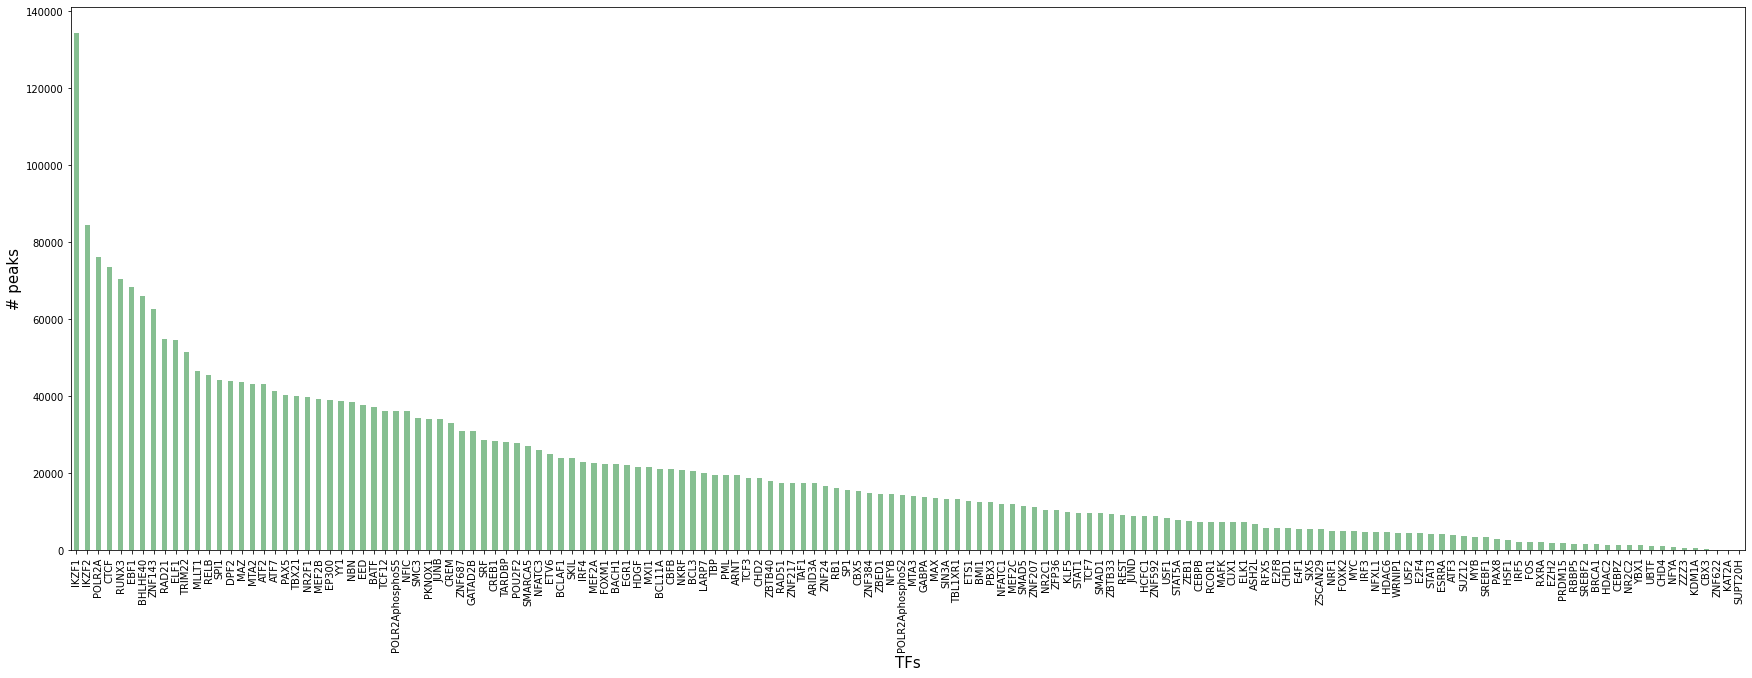

In [2]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1,figsize=(30, 10))
data = data.drop_duplicates()
data[3].value_counts().plot(kind="bar", ax=ax, color='#86bf91')
ax.set_xlabel("TFs", size=15)
ax.set_ylabel("# peaks",size=15)

plt.show()

In [3]:
import h5py 
import numpy as np
def import_tfmodisco_motifs(tfm_results_path, trim=True, only_pos=True):
    """
    Imports the PFMs to into a dictionary, mapping `(x, y)` to the PFM,
    where `x` is the metacluster index and `y` is the pattern index.
    Arguments:
        `tfm_results_path`: path to HDF5 containing TF-MoDISco results
        `out_dir`: where to save motifs
        `trim`: if True, trim the motif flanks based on information content
        `only_pos`: if True, only return motifs with positive contributions
    Returns the dictionary of PFMs.
    """ 
    pfms = {}
    with h5py.File(tfm_results_path, "r") as f:
        metaclusters = f["metacluster_idx_to_submetacluster_results"]
        num_metaclusters = len(metaclusters.keys())
        for metacluster_i, metacluster_key in enumerate(metaclusters.keys()):
            metacluster = metaclusters[metacluster_key]
            print(len(metacluster["seqlets"].value))
            if "patterns" not in metacluster["seqlets_to_patterns_result"]:
                continue
            patterns = metacluster["seqlets_to_patterns_result"]["patterns"]
            num_patterns = len(patterns["all_pattern_names"][:])
            for pattern_i, pattern_name in enumerate(patterns["all_pattern_names"][:]):
                pattern_name = pattern_name.decode()
                pattern = patterns[pattern_name]
                key = "metacluster_"+str(metacluster_i)+".pattern_"+str(pattern_i)
                
                if key not in pfms:
                    pfms[key] = []

                for seqlet in pattern["seqlets_and_alnmts"]["seqlets"]:
                    pfms[key].append(seqlet.decode("utf-8"))
               
    return pfms

In [4]:
tfm_results_path="/oak/stanford/groups/akundaje/projects/chrombpnet_paper_new/modisco_jun_30/modisco/ATAC/GM12878/modisco_crop_500_100K_seqs_1/modisco_results_allChroms_counts.hdf5"
pfms = import_tfmodisco_motifs(tfm_results_path)

/users/anusri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.


100000
1016


In [9]:
import pandas as pd
tomtom="/oak/stanford/groups/akundaje/projects/chrombpnet_paper_new/modisco_jun_30/modisco/ATAC/GM12878/modisco_crop_500_100K_seqs_1/counts.tomtom.tsv"
tomtom = pd.read_csv(tomtom, sep="\t", header=0)
tomtom

,Pattern,Num_Seqlets,Match_1,q-value,Match_2,q-value.1,Match_3,q-value.2,Match_4,q-value.3,...,Match_6,q-value.5,Match_7,q-value.6,Match_8,q-value.7,Match_9,q-value.8,Match_10,q-value.9
0,metacluster_0.pattern_0,12752,IRF1_MOUSE.H11MO.0.A,1.232340e-03,IRF1_HUMAN.H11MO.0.A,1.411650e-03,STAT2_HUMAN.H11MO.0.A,1.699890e-03,STAT2_MOUSE.H11MO.0.A,1.699890e-03,...,IRF2_HUMAN.H11MO.0.A,2.548220e-03,IRF2_MOUSE.H11MO.0.B,2.548220e-03,STAT1_MOUSE.H11MO.0.A,3.019930e-03,STAT1+STAT2_MA0517.1,4.523650e-03,IRF4_MOUSE.H11MO.0.A,4.523650e-03
1,metacluster_0.pattern_1,11792,CTCF_MA0139.1,1.823750e-12,CTCF_HUMAN.H11MO.0.A,1.447700e-09,CTCF_MOUSE.H11MO.0.A,1.354430e-08,CTCF_C2H2_1,4.617570e-06,...,CTCFL_MOUSE.H11MO.0.A,1.082520e-05,CTCFL_MA1102.1,1.475370e-04,ZIC2_MOUSE.H11MO.0.C,1.130590e-01,ZIC3_HUMAN.H11MO.0.B,1.391380e-01,ZIC3_MOUSE.H11MO.0.A,1.391380e-01
2,metacluster_0.pattern_2,10560,SPIB_MOUSE.H11MO.0.A,1.165450e-04,BC11A_HUMAN.H11MO.0.A,1.538380e-04,SPIB_HUMAN.H11MO.0.A,1.579880e-04,SPI1_HUMAN.H11MO.0.A,1.796710e-04,...,ETV5_HUMAN.H11MO.0.C,1.587640e-03,ELF5_HUMAN.H11MO.0.A,1.633000e-03,IRF4_HUMAN.H11MO.0.A,1.873980e-03,IRF8_HUMAN.H11MO.0.B,1.873980e-03,IRF8_MOUSE.H11MO.0.A,1.873980e-03
3,metacluster_0.pattern_3,6013,JDP2_MA0655.1,3.178430e-03,JDP2_bZIP_3,3.178430e-03,FOS+JUND_MA1141.1,3.178430e-03,NFE2_MA0841.1,3.178430e-03,...,FOS+JUN_MA0099.3,3.178430e-03,Jdp2.mouse_bZIP_1,3.178430e-03,FOSL1+JUN_MA1128.1,3.178430e-03,NF2L2_HUMAN.H11MO.0.A,3.178430e-03,FOSL2+JUN_MA1130.1,3.178430e-03
4,metacluster_0.pattern_4,4910,RUNX3_HUMAN.H11MO.0.A,1.984840e-02,RUNX1_HUMAN.H11MO.0.A,1.984840e-02,RUNX1_MOUSE.H11MO.0.A,1.984840e-02,RUNX1_MA0002.2,7.078240e-02,...,RUNX3_MOUSE.H11MO.0.A,7.078240e-02,RUNX2_HUMAN.H11MO.0.A,7.800400e-02,ZNF8_HUMAN.H11MO.0.C,1.289160e-01,PEBB_HUMAN.H11MO.0.C,2.192080e-01,PEBB_MOUSE.H11MO.0.C,2.192080e-01
5,metacluster_0.pattern_5,4708,RELB_HUMAN.H11MO.0.C,3.915710e-06,RELB_MOUSE.H11MO.0.C,3.915710e-06,NFKB2_HUMAN.H11MO.0.B,3.915710e-06,NFKB2_MOUSE.H11MO.0.C,3.915710e-06,...,NFKB1_MOUSE.H11MO.0.A,4.021420e-06,TF65_MOUSE.H11MO.0.A,7.597090e-06,TF65_HUMAN.H11MO.0.A,2.221710e-05,REL_MA0101.1,2.221710e-05,RELA_MA0107.1,7.688130e-05
6,metacluster_0.pattern_6,2744,Gabpa_MA0062.2,1.463250e-05,ELK4_HUMAN.H11MO.0.A,1.463250e-05,ELK4_MA0076.2,5.693360e-05,ELK1_ETS_1,6.468840e-05,...,ELK3_MA0759.1,6.468840e-05,ELK4_ETS_1,6.468840e-05,ELK1_HUMAN.H11MO.0.B,7.239750e-05,GABPA_HUMAN.H11MO.0.A,7.239750e-05,ELK1_ETS_2,7.239750e-05
7,metacluster_0.pattern_7,2448,SP1_HUMAN.H11MO.0.A,5.043270e-07,KLF12_HUMAN.H11MO.0.C,8.921620e-06,SP3_HUMAN.H11MO.0.B,2.453450e-05,SP3_MOUSE.H11MO.0.B,2.453450e-05,...,SP2_HUMAN.H11MO.0.A,1.687770e-04,SP2_MOUSE.H11MO.0.B,1.687770e-04,SP2_MA0516.1,1.687770e-04,SP4_HUMAN.H11MO.0.A,1.687770e-04,SP4_MOUSE.H11MO.0.B,1.687770e-04
8,metacluster_0.pattern_8,1242,REL_MA0101.1,1.529780e-01,NFKB1_HUMAN.H11MO.1.B,1.529780e-01,NFKB1_MOUSE.H11MO.0.A,1.529780e-01,TF65_HUMAN.H11MO.0.A,1.529780e-01,...,RELB_HUMAN.H11MO.0.C,1.529780e-01,RELB_MOUSE.H11MO.0.C,1.529780e-01,TF65_MOUSE.H11MO.0.A,1.719690e-01,RELB_MA1117.1,4.149100e-01,NFKB2_HUMAN.H11MO.0.B,4.149100e-01
9,metacluster_0.pattern_9,1200,NFKB1_HUMAN.H11MO.1.B,6.137960e-03,NFKB1_MOUSE.H11MO.0.A,6.137960e-03,TF65_MOUSE.H11MO.0.A,7.485460e-03,REL_MA0101.1,7.485460e-03,...,REL_HUMAN.H11MO.0.B,7.485460e-03,REL_MOUSE.H11MO.0.A,7.485460e-03,NFKB2_MA0778.1,8.083560e-03,NFKB2_NFAT_1,8.083560e-03,NFKB2_HUMAN.H11MO.0.B,8.083560e-03


In [10]:
bed="ls 8/GM12878_full.interpreted_regions.bed"
bed = pd.read_csv(bed, sep="\t", header=None)


In [11]:
lists=[]
for key in pfms:
    print(key)
    if key in tomtom["Pattern"].values:
        match_name = tomtom[tomtom["Pattern"]==key]["Match_1"]
        keyd = key.split("_")[1].replace(".pattern","")+"_"+key.split("_")[-1]+"_"+match_name
        keyd = keyd.values[0]
        #print(keyd.values[0])
        for seqlet in pfms[key]:
            vals = seqlet.split(",")
            peak_id = int(vals[0].split(":")[1])
            ss = vals[1].split(":")[1]
            ee = vals[2].split(":")[1]
            blist = [bed.loc[peak_id,0], bed.loc[peak_id,1]+bed.loc[peak_id,9]-250+int(ss), bed.loc[peak_id,1]+bed.loc[peak_id,9]-250+int(ee), keyd]
            lists.append(blist)
    else:
        print(key)
            

metacluster_0.pattern_0
metacluster_0.pattern_1
metacluster_0.pattern_2
metacluster_0.pattern_3
metacluster_0.pattern_4
metacluster_0.pattern_5
metacluster_0.pattern_6
metacluster_0.pattern_7
metacluster_0.pattern_8
metacluster_0.pattern_9
metacluster_0.pattern_10
metacluster_0.pattern_11
metacluster_0.pattern_12
metacluster_0.pattern_13
metacluster_0.pattern_14
metacluster_0.pattern_15
metacluster_0.pattern_16
metacluster_0.pattern_17
metacluster_0.pattern_18
metacluster_0.pattern_19
metacluster_0.pattern_20
metacluster_0.pattern_21
metacluster_0.pattern_22
metacluster_0.pattern_23
metacluster_0.pattern_24
metacluster_0.pattern_25
metacluster_0.pattern_26
metacluster_0.pattern_27
metacluster_0.pattern_28
metacluster_0.pattern_29
metacluster_0.pattern_30
metacluster_0.pattern_31
metacluster_0.pattern_32
metacluster_0.pattern_33
metacluster_0.pattern_34
metacluster_0.pattern_35
metacluster_0.pattern_36
metacluster_1.pattern_0
metacluster_1.pattern_1
metacluster_1.pattern_2
metacluster_1

In [12]:
print(len(lists))
data = pd.DataFrame(lists)
print(data.head())

72329
       0          1          2                         3
0  chr15   60255577   60255607  0_0_IRF1_MOUSE.H11MO.0.A
1   chr1  236870847  236870877  0_0_IRF1_MOUSE.H11MO.0.A
2  chr12   12636802   12636832  0_0_IRF1_MOUSE.H11MO.0.A
3  chr17   62165512   62165542  0_0_IRF1_MOUSE.H11MO.0.A
4  chr16   57042267   57042297  0_0_IRF1_MOUSE.H11MO.0.A


In [13]:
data.to_csv("/oak/stanford/groups/akundaje/projects/chromatin-atlas-2022/chrombpnet/merged/GM12878/modisco_hits.bed",sep="\t",index=False,header=False)


In [14]:
chip_intersect = pd.read_csv("/oak/stanford/groups/akundaje/projects/chromatin-atlas-2022/chrombpnet/merged/GM12878/temp/in_chip_seq_peaks.bed", sep='\t',header=None)

In [15]:
chip_intersect.head()

,0,1,2,3,4,5,6,7,8
0,chr15,60255577,60255607,0_0_IRF1_MOUSE.H11MO.0.A,chr15,60255583,60255603,BATF,20
1,chr15,60255577,60255607,0_0_IRF1_MOUSE.H11MO.0.A,chr15,60255584,60255604,CREM,20
2,chr15,60255577,60255607,0_0_IRF1_MOUSE.H11MO.0.A,chr15,60255582,60255602,DPF2,20
3,chr15,60255577,60255607,0_0_IRF1_MOUSE.H11MO.0.A,chr15,60255584,60255604,EP300,20
4,chr15,60255577,60255607,0_0_IRF1_MOUSE.H11MO.0.A,chr15,60255579,60255599,IRF4,20


In [16]:
chip_intersect["id"] = chip_intersect[0] + "_" + chip_intersect[1].astype(str) + "_" + chip_intersect[2].astype(str) + "_" + chip_intersect[3]




In [17]:
chip_intersect.head()

,0,1,2,3,4,5,6,7,8,id
0,chr15,60255577,60255607,0_0_IRF1_MOUSE.H11MO.0.A,chr15,60255583,60255603,BATF,20,chr15_60255577_60255607_0_0_IRF1_MOUSE.H11MO.0.A
1,chr15,60255577,60255607,0_0_IRF1_MOUSE.H11MO.0.A,chr15,60255584,60255604,CREM,20,chr15_60255577_60255607_0_0_IRF1_MOUSE.H11MO.0.A
2,chr15,60255577,60255607,0_0_IRF1_MOUSE.H11MO.0.A,chr15,60255582,60255602,DPF2,20,chr15_60255577_60255607_0_0_IRF1_MOUSE.H11MO.0.A
3,chr15,60255577,60255607,0_0_IRF1_MOUSE.H11MO.0.A,chr15,60255584,60255604,EP300,20,chr15_60255577_60255607_0_0_IRF1_MOUSE.H11MO.0.A
4,chr15,60255577,60255607,0_0_IRF1_MOUSE.H11MO.0.A,chr15,60255579,60255599,IRF4,20,chr15_60255577_60255607_0_0_IRF1_MOUSE.H11MO.0.A


In [18]:
chip_intersect["summit_distance"] = np.abs(((chip_intersect[1].astype(int)+chip_intersect[2].astype(int))/2)-((chip_intersect[5]+chip_intersect[6])/2))



In [19]:
chip_regions = pd.read_csv("/oak/stanford/groups/akundaje/projects/chromatin-atlas-2022/chrombpnet/merged/GM12878/temp/output.bed", sep="\t", header=None)

chip_regions.head()

,0,1,2,3
0,chr1,778681,778701,ARID3A
1,chr1,870040,870060,ARID3A
2,chr1,904768,904788,ARID3A
3,chr1,940412,940432,ARID3A
4,chr1,960690,960710,ARID3A


In [20]:

len(set(chip_regions[3]))

152

In [21]:
len(set(data[3]))

51

In [55]:
motifs_to_chip = np.zeros((len(set(data[3])),len(set(chip_regions[3]))))

In [56]:
unique_motifs = list(set(data[3]))
uniq_tfs = list(set(chip_regions[3]))

unique_motifs1 = [i for i in unique_motifs if int(i.split("_")[0]) == 0]
unique_motifs2  = [i for i in unique_motifs if int(i.split("_")[0]) == 1]
indxs1 = np.argsort([int(i.split("_")[1]) for i in unique_motifs1])
indxs2 = np.argsort([int(i.split("_")[1]) for i in unique_motifs2])
unique_motifs = list(np.array(unique_motifs1)[indxs1]) +  list(np.array(unique_motifs2)[indxs2])
unique_motifs

['0_0_IRF1_MOUSE.H11MO.0.A',
 '0_1_CTCF_MA0139.1',
 '0_2_SPIB_MOUSE.H11MO.0.A',
 '0_3_JDP2_MA0655.1',
 '0_4_RUNX3_HUMAN.H11MO.0.A',
 '0_5_RELB_HUMAN.H11MO.0.C',
 '0_6_Gabpa_MA0062.2',
 '0_7_SP1_HUMAN.H11MO.0.A',
 '0_8_REL_MA0101.1',
 '0_9_NFKB1_HUMAN.H11MO.1.B',
 '0_10_NFYB_HUMAN.H11MO.0.A',
 '0_11_ATF1_HUMAN.H11MO.0.B',
 '0_12_BATF_HUMAN.H11MO.0.A',
 '0_13_POU5F1_MA1115.1',
 '0_14_RUNX1_HUMAN.H11MO.0.A',
 '0_15_NRF1_MOUSE.H11MO.0.A',
 '0_16_PAX2_PAX_1',
 '0_17_ETS1_HUMAN.H11MO.0.A',
 '0_18_COE1_MOUSE.H11MO.0.A',
 '0_19_ZNF76_HUMAN.H11MO.0.C',
 '0_20_MEF2D_HUMAN.H11MO.0.A',
 '0_21_IRF9_IRF_1',
 '0_22_SPIB_ETS_1',
 '0_23_TYY1_HUMAN.H11MO.0.A',
 '0_24_MSX2_homeodomain_1',
 '0_25_HNF1B_HUMAN.H11MO.0.A',
 '0_26_ZBTB33_MA0527.1',
 '0_27_JUND_MA0492.1',
 '0_28_Rfx1_MA0509.1',
 '0_29_PAX5_MOUSE.H11MO.0.A',
 '0_30_BATF3_HUMAN.H11MO.0.B',
 '0_31_IRF7_HUMAN.H11MO.0.C',
 '0_32_ZNF384_MA1125.1',
 '0_33_IRF4_HUMAN.H11MO.0.A',
 '0_34_SP1_HUMAN.H11MO.0.A',
 '0_35_BATF+JUN_MA0462.1',
 '0_36_GLI2_C2H2_

In [57]:
#chip_intersect_assoc = chip_intersect.loc[chip_intersect.groupby('id')['summit_distance'].idxmin(),:]
chip_intersect_assoc = chip_intersect.loc[chip_intersect.groupby('id')['summit_distance'].idxmin(),:]

In [58]:
idx=0
for td_i in unique_motifs:
    print(td_i)
    temp = chip_intersect[chip_intersect[3]==td_i]
    
    #if td_i != "0_0_IRF1_MOUSE.H11MO.0.A":
     #   idx+=1
     #   continue

    alltfs = temp.loc[:,7].values
    #print("indiv",temp.groupby(7).size()[["IRF4",'MTA2','NFIC','BHLHE40','SPI1','JUNB','RUNX3','BATF','EP300','IKZF2','IKZF1']])

    for tf_i in range(len(uniq_tfs)):
        if uniq_tfs[tf_i] in alltfs:
            #print(uniq_tfs[tf_i])
            # expected value from mean tf intersections
            #temp2 = chip_intersect[chip_intersect[7]==uniq_tfs[tf_i]]
            #expected =  np.median(temp2.groupby(3).size())
            
            # expected value from mean motif intersections
            expected = np.median(temp.groupby(7).size())
            motifs_to_chip[idx,tf_i] = np.sum(alltfs==uniq_tfs[tf_i])/expected
            #if uniq_tfs[tf_i] in ['MTA2','NFIC','BHLHE40','SPI1','JUNB','RUNX3','BATF','EP300','IKZF2','IKZF1']:
            #    print(uniq_tfs[tf_i])
            #    print("indiv",temp.groupby(7).size())
            #    print("only",np.sum(alltfs==uniq_tfs[tf_i]))
            #    print("expected",expected)
            #    print(motifs_to_chip[idx,tf_i])

    npdx = np.argsort(motifs_to_chip[idx,])[-3:]
    print(unique_motifs[idx],np.array(uniq_tfs)[npdx])
    idx+=1
        

0_0_IRF1_MOUSE.H11MO.0.A
0_0_IRF1_MOUSE.H11MO.0.A ['EP300' 'IKZF2' 'IKZF1']
0_1_CTCF_MA0139.1
0_1_CTCF_MA0139.1 ['ZNF143' 'RAD21' 'CTCF']
0_2_SPIB_MOUSE.H11MO.0.A
0_2_SPIB_MOUSE.H11MO.0.A ['ELF1' 'IKZF1' 'SPI1']
0_3_JDP2_MA0655.1
0_3_JDP2_MA0655.1 ['IKZF1' 'JUNB' 'BATF']
0_4_RUNX3_HUMAN.H11MO.0.A
0_4_RUNX3_HUMAN.H11MO.0.A ['IKZF2' 'IKZF1' 'RUNX3']
0_5_RELB_HUMAN.H11MO.0.C
0_5_RELB_HUMAN.H11MO.0.C ['IKZF2' 'IKZF1' 'RELB']
0_6_Gabpa_MA0062.2
0_6_Gabpa_MA0062.2 ['ELK1' 'GABPA' 'ELF1']
0_7_SP1_HUMAN.H11MO.0.A
0_7_SP1_HUMAN.H11MO.0.A ['ZNF143' 'ELF1' 'MAZ']
0_8_REL_MA0101.1
0_8_REL_MA0101.1 ['EBF1' 'IKZF2' 'IKZF1']
0_9_NFKB1_HUMAN.H11MO.1.B
0_9_NFKB1_HUMAN.H11MO.1.B ['IKZF2' 'RELB' 'IKZF1']
0_10_NFYB_HUMAN.H11MO.0.A
0_10_NFYB_HUMAN.H11MO.0.A ['IRF3' 'SP1' 'NFYB']
0_11_ATF1_HUMAN.H11MO.0.B
0_11_ATF1_HUMAN.H11MO.0.B ['BHLHE40' 'CREM' 'CREB1']
0_12_BATF_HUMAN.H11MO.0.A
0_12_BATF_HUMAN.H11MO.0.A ['IKZF1' 'JUNB' 'BATF']
0_13_POU5F1_MA1115.1
0_13_POU5F1_MA1115.1 ['RUNX3' 'IKZF1' 'POU2F2']
0_14_RU

In [59]:
import sklearn.cluster
import scipy.cluster.hierarchy
import scipy.stats

def cluster_matrix_indices(matrix, num_clusters):
    """
    Clusters matrix using k-means. Always clusters on the first
    axis. Returns the indices needed to optimally order the matrix
    by clusters.
    """
    if len(matrix) == 1:
        # Don't cluster at all
        return np.array([0])

    num_clusters = min(num_clusters, len(matrix))
    
    # Perform k-means clustering
    kmeans = sklearn.cluster.KMeans(n_clusters=num_clusters)
    cluster_assignments = kmeans.fit_predict(matrix)

    # Perform hierarchical clustering on the cluster centers to determine optimal ordering
    kmeans_centers = kmeans.cluster_centers_
    cluster_order = scipy.cluster.hierarchy.leaves_list(
        scipy.cluster.hierarchy.optimal_leaf_ordering(
            scipy.cluster.hierarchy.linkage(kmeans_centers, method="centroid"), kmeans_centers
        )
    )

    # Order the peaks so that the cluster assignments follow the optimal ordering
    cluster_inds = []
    for cluster_id in cluster_order:
        cluster_inds.append(np.where(cluster_assignments == cluster_id)[0])
    cluster_inds = np.concatenate(cluster_inds)
    return cluster_inds

/users/anusri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()


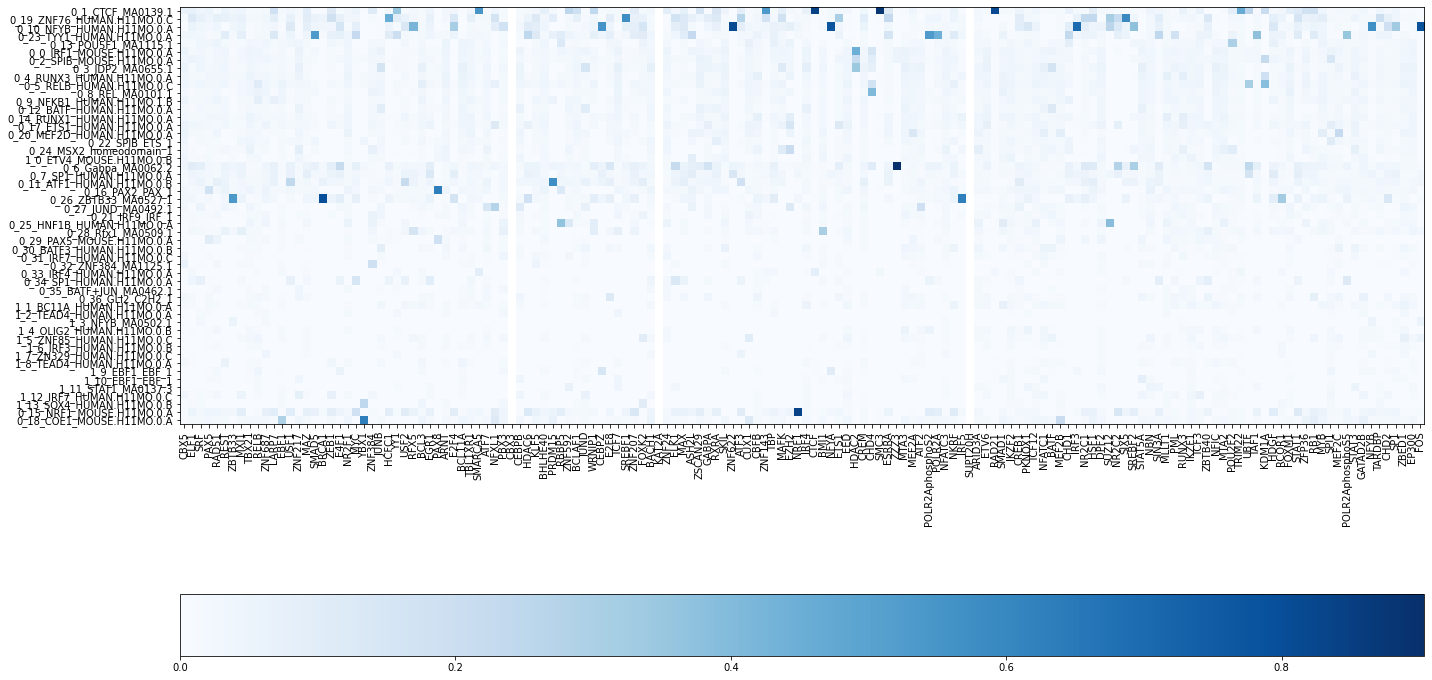

In [60]:
import matplotlib

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

import matplotlib.pyplot as plt
from matplotlib.colors import TwoSlopeNorm

# Create a figure with the right dimensions
fig, ax = plt.subplots(figsize=(20, 16))


inds = cluster_matrix_indices(motifs_to_chip,10)


hmap = ax.imshow(motifs_to_chip[inds]/np.sum(motifs_to_chip[inds],axis=0), cmap="Blues")
#hmap = ax.imshow(coop_matrix)


# plotting
#hmap = plt.imshow(ls.blend_hsv(z_data_rgb, coop_matrix[inds][:, inds]))


# Set axes on heatmap
ax.set_yticks(np.arange(len(unique_motifs)))
ax.set_yticklabels(np.array(unique_motifs)[inds])
ax.set_xticks(np.arange(len(uniq_tfs)))
ax.set_xticklabels(np.array(uniq_tfs), rotation=90)

#Loop over data dimensions and create text annotations.
#for i in range(len(row_names)):
#    for j in range(len(row_names)):
#        if np.round(coop_matrix_n[inds][i, j],2) !=0 :
#            ax.text(j, i, np.round(coop_matrix_n[inds][i, j],2), ha="center", va="center")
fig.colorbar(hmap, orientation="horizontal")

fig.tight_layout()
    

plt.show()

['0_0_IRF1_MOUSE.H11MO.0.A',
 '0_1_CTCF_MA0139.1',
 '0_2_SPIB_MOUSE.H11MO.0.A',
 '0_3_JDP2_MA0655.1',
 '0_4_RUNX3_HUMAN.H11MO.0.A',
 '0_5_RELB_HUMAN.H11MO.0.C',
 '0_6_Gabpa_MA0062.2',
 '0_7_SP1_HUMAN.H11MO.0.A',
 '0_8_REL_MA0101.1',
 '0_9_NFKB1_HUMAN.H11MO.1.B',
 '0_10_NFYB_HUMAN.H11MO.0.A',
 '0_11_ATF1_HUMAN.H11MO.0.B',
 '0_12_BATF_HUMAN.H11MO.0.A',
 '0_13_POU5F1_MA1115.1',
 '0_14_RUNX1_HUMAN.H11MO.0.A',
 '0_15_NRF1_MOUSE.H11MO.0.A',
 '0_16_PAX2_PAX_1',
 '0_17_ETS1_HUMAN.H11MO.0.A',
 '0_18_COE1_MOUSE.H11MO.0.A',
 '0_19_ZNF76_HUMAN.H11MO.0.C',
 '0_20_MEF2D_HUMAN.H11MO.0.A',
 '0_21_IRF9_IRF_1',
 '0_22_SPIB_ETS_1',
 '0_23_TYY1_HUMAN.H11MO.0.A',
 '0_24_MSX2_homeodomain_1',
 '0_25_HNF1B_HUMAN.H11MO.0.A',
 '0_26_ZBTB33_MA0527.1',
 '0_27_JUND_MA0492.1',
 '0_28_Rfx1_MA0509.1',
 '0_29_PAX5_MOUSE.H11MO.0.A',
 '0_30_BATF3_HUMAN.H11MO.0.B',
 '0_31_IRF7_HUMAN.H11MO.0.C',
 '0_32_ZNF384_MA1125.1',
 '0_33_IRF4_HUMAN.H11MO.0.A',
 '0_34_SP1_HUMAN.H11MO.0.A',
 '0_35_BATF+JUN_MA0462.1',
 '0_36_GLI2_C2H2_

0_0_IRF1_MOUSE.H11MO.0.A
(19039, 11)
0_1_CTCF_MA0139.1
(48293, 11)
0_2_SPIB_MOUSE.H11MO.0.A
(19977, 11)
0_3_JDP2_MA0655.1
(15443, 11)
0_4_RUNX3_HUMAN.H11MO.0.A
(12667, 11)
0_5_RELB_HUMAN.H11MO.0.C
(6459, 11)
0_6_Gabpa_MA0062.2
(9890, 11)
0_7_SP1_HUMAN.H11MO.0.A
(4430, 11)
0_8_REL_MA0101.1
(1910, 11)
0_9_NFKB1_HUMAN.H11MO.1.B
(1882, 11)
0_10_NFYB_HUMAN.H11MO.0.A
(3247, 11)
0_11_ATF1_HUMAN.H11MO.0.B
(4405, 11)
0_12_BATF_HUMAN.H11MO.0.A
(3182, 11)
0_13_POU5F1_MA1115.1
(1329, 11)
0_14_RUNX1_HUMAN.H11MO.0.A
(1898, 11)
0_15_NRF1_MOUSE.H11MO.0.A
(1961, 11)
0_16_PAX2_PAX_1
(1388, 11)
0_17_ETS1_HUMAN.H11MO.0.A
(1731, 11)
0_18_COE1_MOUSE.H11MO.0.A
(1724, 11)
0_19_ZNF76_HUMAN.H11MO.0.C
(2153, 11)
0_20_MEF2D_HUMAN.H11MO.0.A
(1321, 11)
0_21_IRF9_IRF_1
(722, 11)
0_22_SPIB_ETS_1
(975, 11)
0_23_TYY1_HUMAN.H11MO.0.A
(2012, 11)
0_24_MSX2_homeodomain_1
(922, 11)
0_25_HNF1B_HUMAN.H11MO.0.A
(265, 11)
0_26_ZBTB33_MA0527.1
(798, 11)
0_27_JUND_MA0492.1
(528, 11)
0_28_Rfx1_MA0509.1
(309, 11)
0_29_PAX5_MOUSE.H1

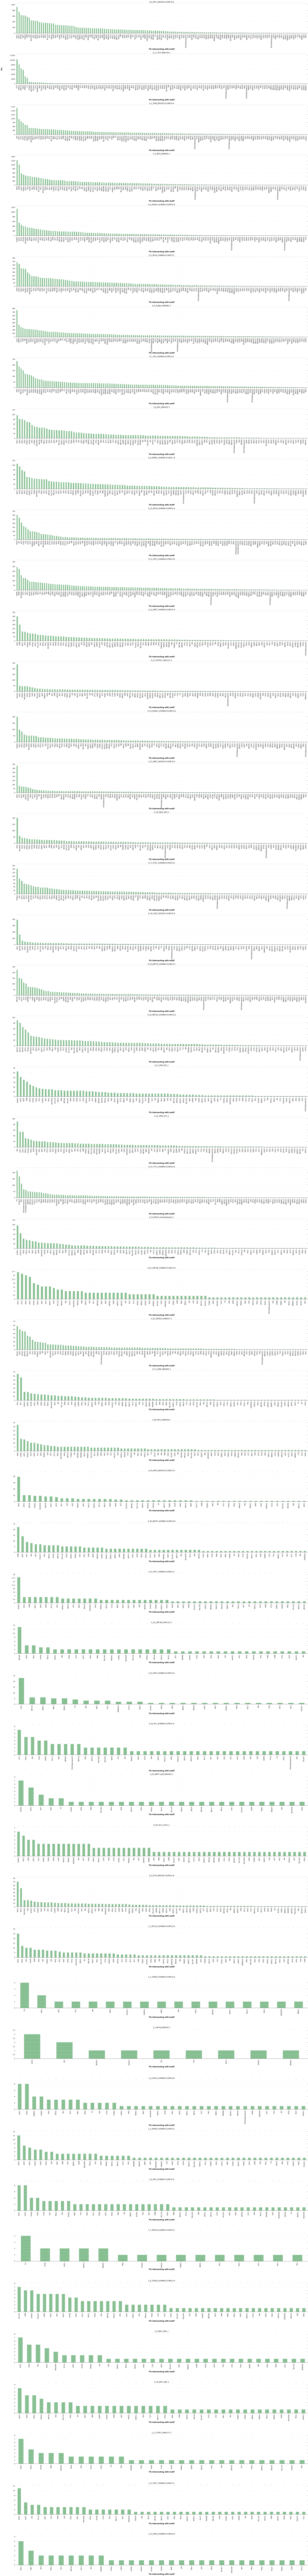

In [31]:
from matplotlib.ticker import StrMethodFormatter
fig, ax = plt.subplots(len(unique_motifs),1,figsize=(30, 250))

for i, categorical_feature in enumerate(unique_motifs):
    print(categorical_feature)
    print(chip_intersect[chip_intersect[3]==categorical_feature].shape)
    if chip_intersect[chip_intersect[3]==categorical_feature].shape[0] == 0:
        continue
    chip_intersect[chip_intersect[3]==categorical_feature][7].value_counts().plot(kind="bar", ax=ax[i], color='#86bf91')
    ax[i].set_title(categorical_feature, loc="center")

for i,x in enumerate(ax):

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Set x-axis label
    x.set_xlabel("Tfs intersecting with motif", weight='bold', size=12)

    # Set y-axis label
    if i == 1:
        x.set_ylabel("TFs", labelpad=50, weight='bold', size=12)

    # Format y-axis label
    x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

    x.tick_params(axis='x', rotation=90)
    
plt.tight_layout()

In [30]:
len(set(chip_intersect_subset[7]))

145

<Figure size 1600x8000 with 0 Axes>

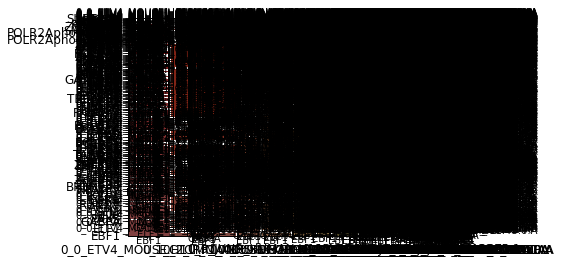

In [32]:
from statsmodels.graphics.mosaicplot import mosaic

plt.figure(figsize=(20, 100), dpi=80)

plt.rcParams['font.size'] = 6.0
mosaic(chip_intersect, [3, 7]);


In [26]:
sum(chip_intersect_subset[7]=="ZNF143")

13121

In [27]:
sum(chip_intersect_subset[7]=="CTCF")

41547